# Exploratory Analysis using Visual Summaries

words

## Scatter Plots

words

## Higher Dimensional Scatter Plots

words

1. Links


In [1]:
# code example

## Contour Plots

A contour plot is ...



Here we will do an example with a file that contains topographic data in XYZ format.

The file is [pip-corner-sumps.txt](http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson8/pip-corner-sumps.txt)

The first few lines of the file are

```
X-Easting	Y-Northing	Z-Elevation
74.90959724	93.21251922	0
75.17907367	64.40278759	0
94.9935575	93.07951286	0
95.26234119	64.60091165	0
54.04976655	64.21159095	0
54.52914363	35.06934342	0
75.44993558	34.93079513	0

```

Clearly NOT regular spaced in the X and Y axes.  Here is a simple script to load the irregular data and interpolate onto a uniform spaced XYZ grid for plotting.

In [2]:
#Step 1: import needed modules to interact with the internet
import requests
#Step 2: make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url="http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson8/pip-corner-sumps.txt"  # set the url
response = requests.get(remote_url, allow_redirects=True)     
#Step 3: read the file and store a copy locally
open('pip-corner-sumps.txt','wb').write(response.content);# extract from the remote the contents, assign to a local file same name

Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

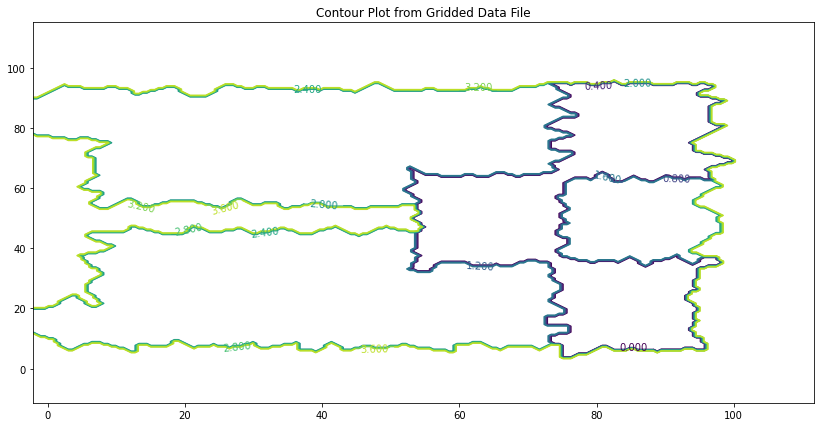

In [3]:
#Step 4: Read and process the file, generate the contour plot
# http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/Lab07.html
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
import pandas
my_xyz = pandas.read_csv('pip-corner-sumps.txt',sep='\t') # read an ascii file already prepared, delimiter is tabs
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz['X-Easting'].values.tolist()
coord_y = my_xyz['Y-Northing'].values.tolist()
coord_z = my_xyz['Z-Elevation'].values.tolist()
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 200)
lat = numpy.linspace(min(coord_y), max(coord_y), 200)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='nearest')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 12)
ax.clabel(CS, inline=2, fontsize=10)
ax.set_title('Contour Plot from Gridded Data File')

The gridded data contained is regularly spaced we can use a 3D point cloud plot to demonstrate.

1. [3D Scatter Plot/Point Clouds](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/)



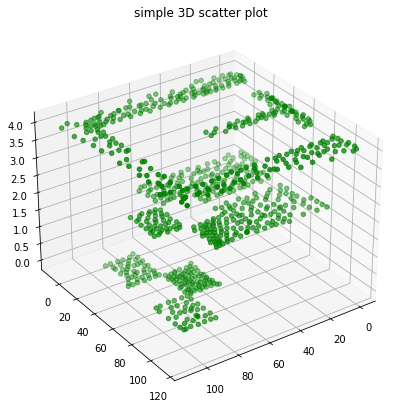

In [4]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(coord_x, coord_y, coord_z, color = "green")
#ax.scatter3D(x1, y1, z1, color = "red")
plt.title("simple 3D scatter plot")
zangle = 55
ax.view_init(30, zangle)
 
# show plot
plt.show()

Now repeat (in red) with the gridded data

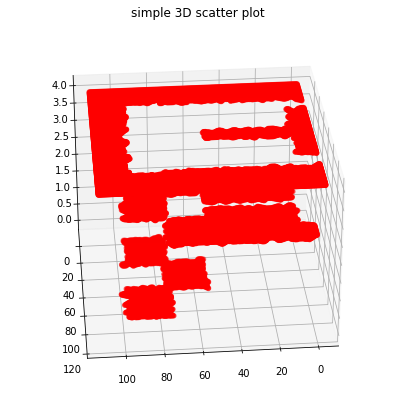

In [5]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
#
model_x = X.tolist()
model_y = Y.tolist()
model_z = Z.tolist()

#coord_x = my_xyz['X-Easting'].values.tolist()
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(model_x, model_y, model_z, color = "red")
#ax.scatter3D(x1, y1, z1, color = "red")
plt.title("simple 3D scatter plot")
zangle = 85
ax.view_init(30, zangle)
 
# show plot
plt.show()

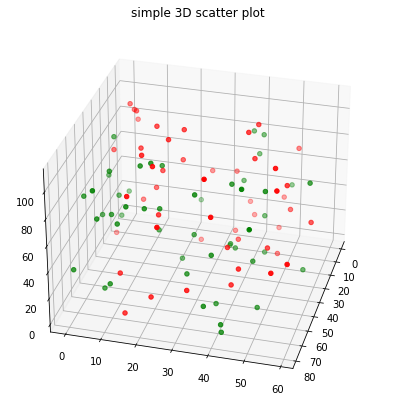

In [6]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Create datasets
z = np.random.randint(100, size =(50))
x = np.random.randint(80, size =(50))
y = np.random.randint(60, size =(50))

z1 = np.random.randint(110, size =(50))
x1 = np.random.randint(80, size =(50))
y1 = np.random.randint(60, size =(50))
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
ax.scatter3D(x1, y1, z1, color = "red")
plt.title("simple 3D scatter plot")
zangle = 15
ax.view_init(30, zangle)
 
# show plot
plt.show()

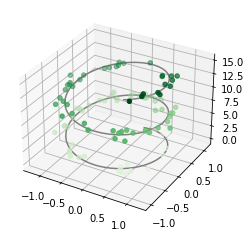

In [7]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection='3d')

#ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');


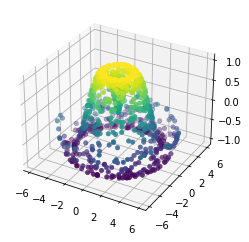

In [8]:


def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)



ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='viridis', linewidth=0.5);



Surface plots render the points as facets on a surface, or as a wireframe.  Somethimes this is a useful way to detect relationships.

1. [Surface Plots](https://www.geeksforgeeks.org/3d-surface-plotting-in-python-using-matplotlib/)

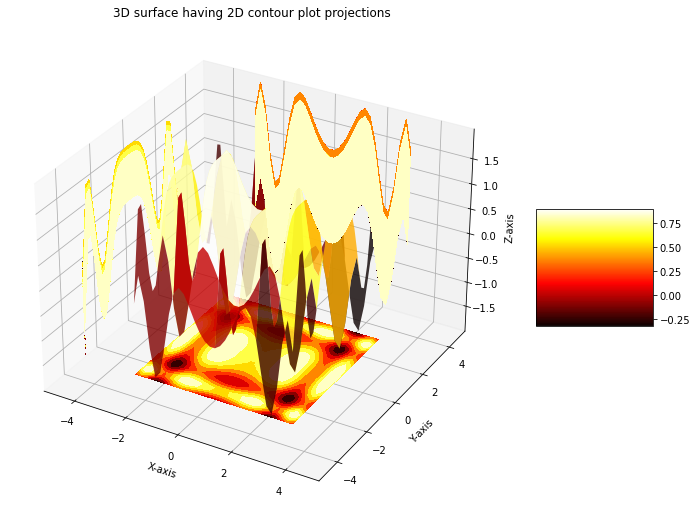

In [9]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating dataset
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = (np.sin(x **2) + np.cos(y **2) )
##x = X
##y = Y
##z = Z
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating color map
my_cmap = plt.get_cmap('hot')
 
# Creating plot
surf = ax.plot_surface(x, y, z,
                       rstride = 8,
                       cstride = 8,
                       alpha = 0.8,
                       cmap = my_cmap)
cset = ax.contourf(x, y, z,
                   zdir ='z',
                   offset = np.min(z),
                   cmap = my_cmap)
cset = ax.contourf(x, y, z,
                   zdir ='x',
                   offset =-5,
                   cmap = my_cmap)
cset = ax.contourf(x, y, z,
                   zdir ='y',
                   offset = 5,
                   cmap = my_cmap)
fig.colorbar(surf, ax = ax,
             shrink = 0.5,
             aspect = 1)
 
# Adding labels
ax.set_xlabel('X-axis')
ax.set_xlim(-5, 5)
ax.set_ylabel('Y-axis')
ax.set_ylim(-5, 5)
ax.set_zlabel('Z-axis')
ax.set_zlim(np.min(z), np.max(z))
ax.set_title('3D surface having 2D contour plot projections')
 
# show plot
plt.show()

In [10]:
remote_url="http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson8/HighestGrossingMovies.csv"  # set the url
response = requests.get(remote_url, allow_redirects=True)                                            # get the remote resource, follow imbedded links
open('HighestGrossingMovies.csv','wb').write(response.content);                                      # extract from the remote the contents, assign to a local file same name

In [11]:
Movies = pandas.read_csv("HighestGrossingMovies.csv")    
Budget = Movies['Budget_million$']
print("Mean Budget $",Budget.mean()," million USD")

Mean Budget $ 115.66  million USD


A couple of other ways to get the mean values are:

## Box Plots



## Histograms

words

## Violin Plots

words

1. [Violin Plots](https://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/)

<AxesSubplot:xlabel='day', ylabel='tip'>

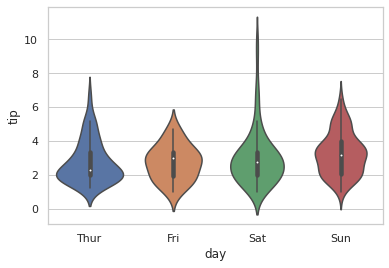

In [12]:
import seaborn
    
    
seaborn.set(style = 'whitegrid') 
tip = seaborn.load_dataset('tips')
  
seaborn.violinplot(x ='day', y ='tip', data = tip)

## Kernel Density Estimator Plots

words


## References (for this section)
